In [2]:
### Mini project Avocados 

## Let's see if we can learn one thing or two about their prices!
#Aim1: Multiple R-squared measures resembling different k-neighbors used for training your KNN regression.
#Aim2: The R-squared measure resembling one additional regression modeling technique such as Linear Regression.

#Load Libraries
import pandas as pd
import numpy as np
import optuna
import time

import seaborn as sbn 
from matplotlib import pyplot as plt

from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

## Try: conventional and organic seperate analysis

Step2: Read data

In [3]:
## import data
df = pd.read_csv('avocado.csv')

In [4]:
## Date - The date of the observation
## AveragePrice - the average price of a single avocado
#type - conventional or organic
#year - the year
#Region - the city or region of the observation
#Total Volume - Total number of avocados sold
#4046/4225/4770 - Total number of avocados with PLU 4046/4225/4770 sold

## Remove Missing Value
df.dropna()
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
#Explore data
df.shape
df.iloc[:,2:12].describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


Step3: Extract Festures: Exclude the region and date from the considered features.

In [6]:
##. exclude date year region column
df1 = df.drop(['Unnamed: 0','Date', 'year', 'region'], axis=1)

y= df1["AveragePrice"] ## Target
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic


Plotting for column AveragePrice


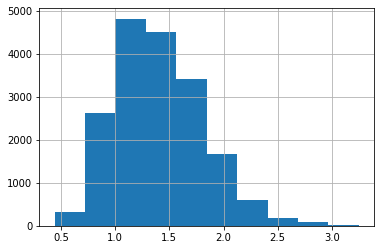

Plotting for column Total Volume


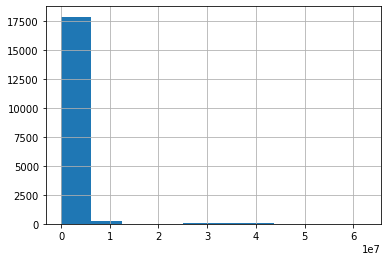

Plotting for column 4046


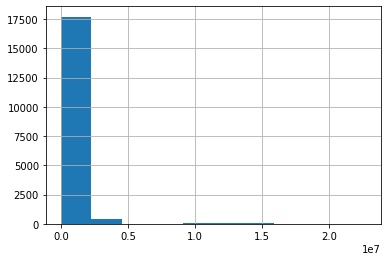

Plotting for column 4225


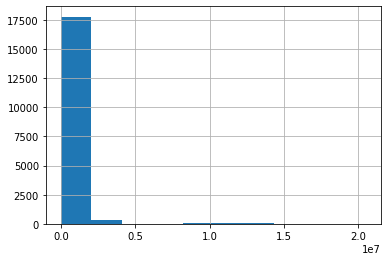

Plotting for column 4770


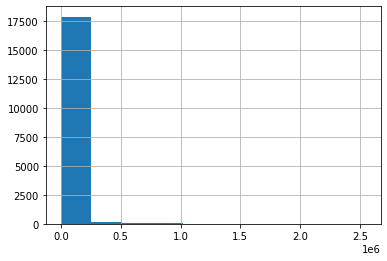

Plotting for column Total Bags


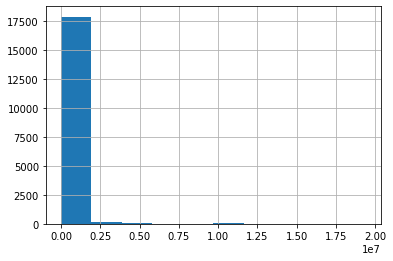

Plotting for column Small Bags


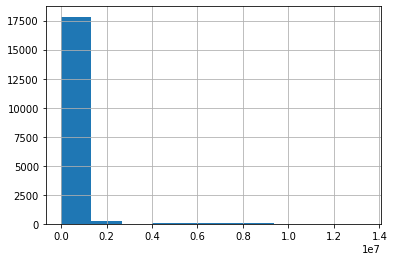

Plotting for column Large Bags


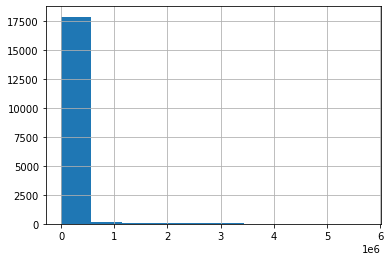

Plotting for column XLarge Bags


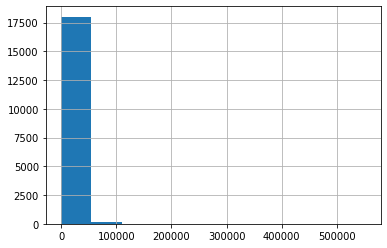

Plotting for column type


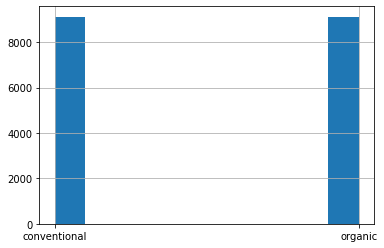

In [11]:
## Exploratory data plots:

for col in df1.columns:
    hist = df1[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

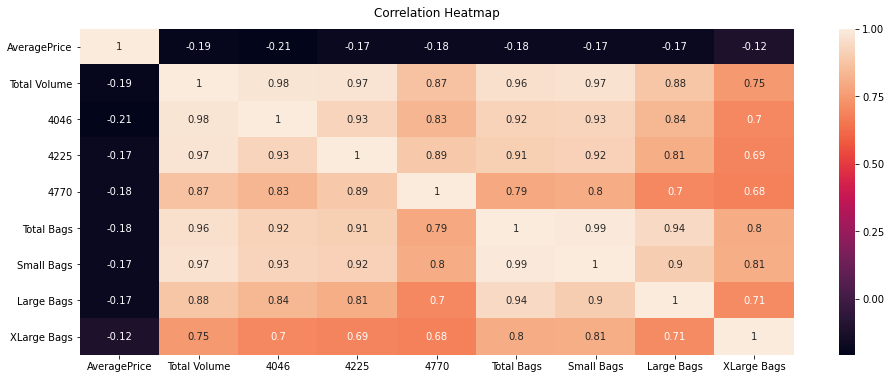

In [12]:
# A correlation matrix heat map.

plt.figure(figsize=(16, 6))
heatmap = sbn.heatmap(df1.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Step 4: Preprocessing

In [7]:
features = df1.drop(['AveragePrice'], axis=1)
print(features.shape)

### Scale numeric Features
numeric_features = features.select_dtypes(include= np.number)
scaler = MinMaxScaler(feature_range=(0,1))
numeric_features = pd.DataFrame(scaler.fit_transform(numeric_features.values), columns=numeric_features.columns, index=numeric_features.index)

### One Hot encoding nominal feature
nominal_feature = pd.get_dummies(features.type)

Final_table = pd.concat([numeric_features, nominal_feature], axis=1)
Final_table

(18249, 9)


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,conventional,organic
0,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,1,0
1,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,1,0
2,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,1,0
3,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,1,0
4,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
18244,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,0,1
18245,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,0,1
18246,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,0,1
18247,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,0,1


Step 5: Splitting Data (80% training, 10% validation, 10% test)

In [8]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(Final_table, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.125, random_state=0) # 0.125 x 0.8 = 0.1

print(X_train_valid.shape)
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(16424, 10)
(1825, 10)
(14371, 10)
(2053, 10)
(1825,)
(14371,)
(2053,)


 Step 6 Training KNN Regression

In [11]:
# Use a KNN Regressor model to train your data.
# Choose the best k for the KNN algorithm by trying different values Choose best K: Optuna
##  MSE, RMSE, MAE, and 𝑅2

def objective(trial):
    params = {
    "n_neighbors": trial.suggest_int("n_neighbors", 2, 100),
    "weights": trial.suggest_categorical('weights', ['uniform', 'distance']),
    "algorithm": trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
    "leaf_size": trial.suggest_int('leaf_size', 5, 100),
    }
    
    model = KNeighborsRegressor(**params)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    r2 = r2_score(y_val ,pred)
    return r2 

start_time = time.time()

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials=100)

total_time = time.time()-start_time

[I 2024-04-08 05:08:06,047] A new study created in memory with name: no-name-0ed13c10-0704-4570-8862-3d58b609d6a7
[I 2024-04-08 05:08:06,177] Trial 0 finished with value: 0.6926997203668535 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 58}. Best is trial 0 with value: 0.6926997203668535.
[I 2024-04-08 05:08:06,299] Trial 1 finished with value: 0.6822228990739458 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 70}. Best is trial 0 with value: 0.6926997203668535.
[I 2024-04-08 05:08:06,953] Trial 2 finished with value: 0.6806710963361393 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 68}. Best is trial 0 with value: 0.6926997203668535.
[I 2024-04-08 05:08:07,167] Trial 3 finished with value: 0.6284128690749198 and parameters: {'n_neighbors': 95, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 29}. Best is trial 0 with value: 0.69269972036685

In [15]:
# Print the R-squared score of your final KNN regressor.
print(f"total_time={total_time}")
print(study.best_params)
print(study.best_value)

best_n_neighbors = study.best_params["n_neighbors"]
best_weights = study.best_params["weights"]
best_algorithm = study.best_params["algorithm"]
best_leaf_size = study.best_params["leaf_size"]

model = KNeighborsRegressor(n_neighbors = best_n_neighbors, weights = best_weights, algorithm = best_algorithm, leaf_size = best_leaf_size)
model.fit(X_train_valid, y_train_valid)
pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test ,pred)
print('r2_score: ', r2)
print('mean_absolute_error: ', mae)

total_time=20.72358012199402
{'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 89}
0.7057651637732747
r2_score:  0.6909961048179828
mean_absolute_error:  0.1515314738297153


In [16]:
## Different regression model: SVR
def objective(trial):
    params = {
    "kernel": trial.suggest_categorical("kernel", ['linear', 'poly', 'rbf', 'sigmoid']),
    "gamma": trial.suggest_categorical("gamma", ["scale", "auto"]),
    "C": trial.suggest_uniform("C", 0.01, 10),
    "degree": trial.suggest_discrete_uniform("degree", 1, 5, 1),
    }
    
    model = SVR(**params)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    r2 = r2_score(y_val ,pred)
    return r2 


In [17]:
start_time = time.time()

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials=100)

total_time = time.time()-start_time



[I 2024-04-08 05:09:54,901] A new study created in memory with name: no-name-a59f66af-ea6f-4807-a7cf-fd960ab3ec0a
/Users/kirannarta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/Users/kirannarta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  import sys
[I 2024-04-08 05:10:08,839] Trial 0 finished with value: -8268.737595678313 and parameters: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 8.240187300365779, 'degree': 5.0}. Best is trial 0 with value: -8268.737595678313.
/Users/kirannarta/anaconda3/lib/python3.6/site-pa

In [18]:
print(f"total_time={total_time}")
print(study.best_params)
print(study.best_value)

total_time=826.7923328876495
{'kernel': 'poly', 'gamma': 'scale', 'C': 9.991164830320496, 'degree': 4.0}
0.42758367775904815


In [20]:
best_kernel = study.best_params["kernel"]
best_gamma = study.best_params["gamma"]
best_C = study.best_params["C"]
best_degree = study.best_params["degree"]

model = SVR(kernel= best_kernel, gamma = best_gamma,  C= best_C, degree = best_degree)
model.fit(X_train_valid, y_train_valid)
pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test ,pred)
print('r2_score: ', r2)
print('mean_absolute_error: ', mae)

r2_score:  0.41231662733943086
mean_absolute_error:  0.23227216442000478


## Conlusion

For the KNN regression method the best parameters are {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 89} resulting in following scores for the final KNN regressor:
r2_score:  0.69
mean_absolute_error:  0.15

Another method tried was SVR: The best parameters for SVR {'kernel': 'poly', 'gamma': 'scale', 'C': 9.991164830320496, 'degree': 4.0}
r2_score:  0.41
mean_absolute_error:  0.23
